**jupyter一些有用的快捷键**

In [ ]:
import sys
print(sys.executable)  # 应输出langchain环境的Python路径

# LangChain

## 安装LangChain

**langchain主要包括以下几个python API（[langchain api](https://python.langchain.com/api_reference/)）**

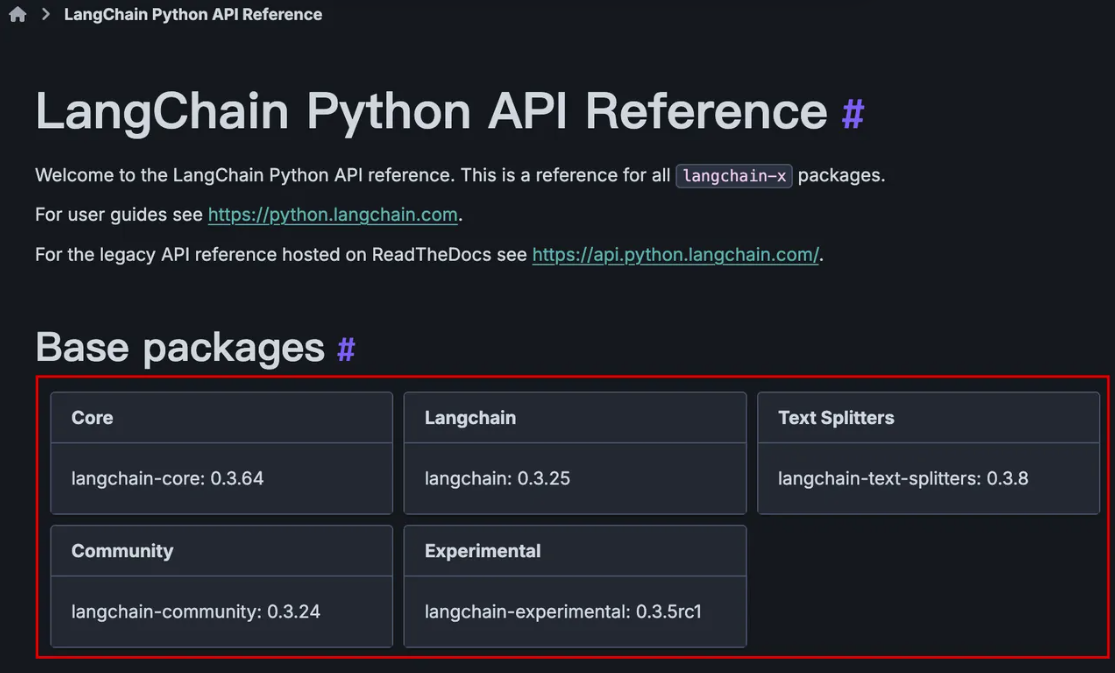

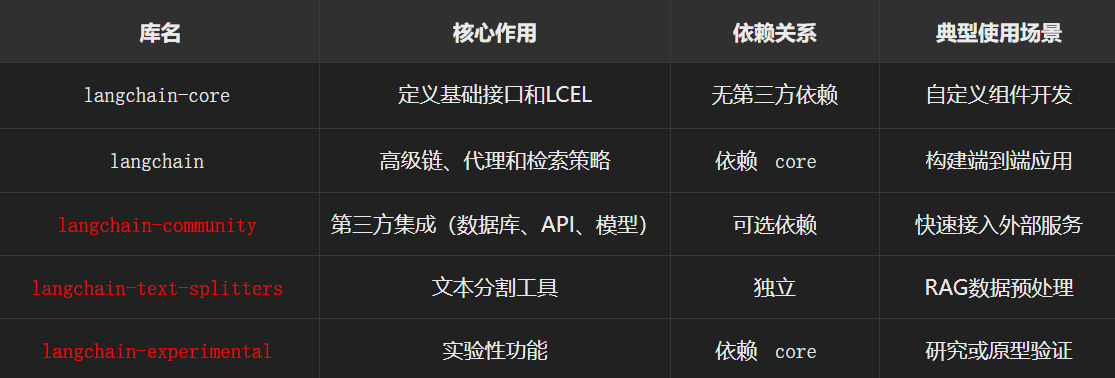

In [3]:
# 必须加 %，表示在当前内核的Python环境中安装
%pip install langchain-text-splitters langchain-community langchain_experimental

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/8b/a3/3696ff2444658053c01b6b7443e761f28bb71217d82bb89137a978c5f66f/langchain_text_splitters-0.3.8-py3-none-any.whl (32 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/44/8e/d3d201f648e8d09dc1072a734c4dc1f59455b91d7d162427256533bf5a87/langchain_community-0.3.26-py3-none-any.whl (2.5 MB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/b2/27/fe8caa4884611286b1f7d6c5cfd76e1fef188faaa946db4fde6daa1cd2cd/langchain_experimental-0.3.4-py3-none-any.whl (209 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/c0/c3/8080431fd7567a340d3a42e36c0bb3970a8d00d5e27bf3ca2103b3b55996/langchain_core-0.3.66-py3-none-any.whl (438 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/80/9d/a2fa9f15f8834de882a92b51e9f33a25da4b38c683a16c2a94a92d86f640/langsmith-0.4.1-py3-none-any.whl (364 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/e5

In [4]:
# 显示都安装了
%pip list|grep langchain

langchain                0.3.26
langchain-community      0.3.26
langchain-core           0.3.66
langchain-experimental   0.3.4
langchain-text-splitters 0.3.8
Note: you may need to restart the kernel to use updated packages.


## 处理PDF数据

**PyPDF 是一个用于处理 PDF 文件的 Python 库，提供读取、拆分、合并、加密等基础操作。它是 LangChain 中 PyPDFLoader 的底层依赖库。**

In [5]:
%pip install pypdf

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/c5/16/a5619a9d9bd4601126b95a9026eccfe4ebb74d725b7fdf624680e5a1f502/pypdf-5.6.1-py3-none-any.whl (304 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
# 导入pdf
from langchain_community.document_loaders import PyPDFLoader

# 加载PDF并按页分割
loader = PyPDFLoader("./Attention Is All You Need.pdf")
pages = loader.load()  # 返回Document对象列表，每页一个元素
print(len(pages))

15


In [7]:
pages[0].dict()

/tmp/ipykernel_639654/1903028777.py:1: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  pages[0].dict()


{'id': None,
 'metadata': {'producer': 'pdfTeX-1.40.25',
  'creator': 'LaTeX with hyperref',
  'creationdate': '2024-04-10T21:11:43+00:00',
  'author': '',
  'keywords': '',
  'moddate': '2024-04-10T21:11:43+00:00',
  'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5',
  'subject': '',
  'title': '',
  'trapped': '/False',
  'source': './Attention Is All You Need.pdf',
  'total_pages': 15,
  'page': 0,
  'page_label': '1'},
 'page_content': 'Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.com\nAidan N. Gomez∗ †\nUniversity of Toronto\naida

In [8]:
print(pages[4].page_content)

output values. These are concatenated and once again projected, resulting in the final values, as
depicted in Figure 2.
Multi-head attention allows the model to jointly attend to information from different representation
subspaces at different positions. With a single attention head, averaging inhibits this.
MultiHead(Q, K, V) = Concat(head1, ...,headh)WO
where headi = Attention(QWQ
i , KWK
i , V WV
i )
Where the projections are parameter matricesWQ
i ∈ Rdmodel×dk , WK
i ∈ Rdmodel×dk , WV
i ∈ Rdmodel×dv
and WO ∈ Rhdv×dmodel .
In this work we employ h = 8 parallel attention layers, or heads. For each of these we use
dk = dv = dmodel/h = 64. Due to the reduced dimension of each head, the total computational cost
is similar to that of single-head attention with full dimensionality.
3.2.3 Applications of Attention in our Model
The Transformer uses multi-head attention in three different ways:
• In "encoder-decoder attention" layers, the queries come from the previous decoder layer,
and the

- RecursiveCharacterTextSplitter 的分割方式
    - 优先级分割：分片器按 separators 的顺序（如 ["\n\n", "\n"]）递归切割文本，只有当前层分隔符无法满足 chunk_size 时才会进入下一层。
    - 边界对齐：重叠部分会尽量对齐到最近的分隔符（如段落或句子结尾），而非机械切割

In [9]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,  # 块大小（字符数）
    chunk_overlap=100,  # 块之间的重叠（字符数）
    separators=["\n\n", "\n"],  # 优先按照"\n\n"分割，然后按照"\n"分割
)

chunks = text_splitter.split_documents(pages)
print(f"分割后得到 {len(chunks)} 个块")

分割后得到 49 个块


In [10]:
print(chunks[0].page_content)

Provided proper attribution is provided, Google hereby grants permission to
reproduce the tables and figures in this paper solely for use in journalistic or
scholarly works.
Attention Is All You Need
Ashish Vaswani∗
Google Brain
avaswani@google.com
Noam Shazeer∗
Google Brain
noam@google.com
Niki Parmar∗
Google Research
nikip@google.com
Jakob Uszkoreit∗
Google Research
usz@google.com
Llion Jones∗
Google Research
llion@google.com
Aidan N. Gomez∗ †
University of Toronto
aidan@cs.toronto.edu
Łukasz Kaiser∗
Google Brain
lukaszkaiser@google.com
Illia Polosukhin∗ ‡
illia.polosukhin@gmail.com
Abstract
The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks that include an encoder and a decoder. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer,
based solely on attention mechanisms, dispensing with recurrence and convolutions


In [11]:
print(chunks[1].page_content)

based solely on attention mechanisms, dispensing with recurrence and convolutions
entirely. Experiments on two machine translation tasks show these models to
be superior in quality while being more parallelizable and requiring significantly
less time to train. Our model achieves 28.4 BLEU on the WMT 2014 English-
to-German translation task, improving over the existing best results, including
ensembles, by over 2 BLEU. On the WMT 2014 English-to-French translation task,
our model establishes a new single-model state-of-the-art BLEU score of 41.8 after
training for 3.5 days on eight GPUs, a small fraction of the training costs of the
best models from the literature. We show that the Transformer generalizes well to
other tasks by applying it successfully to English constituency parsing both with
large and limited training data.
∗Equal contribution. Listing order is random. Jakob proposed replacing RNNs with self-attention and started


In [12]:
len('based solely on attention mechanisms, dispensing with recurrence and convolutions')

81

In [13]:
for i, chunk in enumerate(chunks):
    print(f"chunk {i}: {len(chunk.page_content)} chars")
    print(chunk.page_content)
    print(20*'------')

chunk 0: 986 chars
Provided proper attribution is provided, Google hereby grants permission to
reproduce the tables and figures in this paper solely for use in journalistic or
scholarly works.
Attention Is All You Need
Ashish Vaswani∗
Google Brain
avaswani@google.com
Noam Shazeer∗
Google Brain
noam@google.com
Niki Parmar∗
Google Research
nikip@google.com
Jakob Uszkoreit∗
Google Research
usz@google.com
Llion Jones∗
Google Research
llion@google.com
Aidan N. Gomez∗ †
University of Toronto
aidan@cs.toronto.edu
Łukasz Kaiser∗
Google Brain
lukaszkaiser@google.com
Illia Polosukhin∗ ‡
illia.polosukhin@gmail.com
Abstract
The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks that include an encoder and a decoder. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer,
based solely on attention mechanisms, dispensing with recurrence and convolu

## 处理Markdown数据

**已有现成的markdown文件可以直接用langchain导入，如果是pdf，可以先用工具将pdf转换成markddown，然后再导入**

- [Marker](https://github.com/datalab-to/marker)（开源）
- [Mathpix](https://snip.mathpix.com/home)（闭源，可试用）

In [14]:
with open("./Attention Is All You Need.md", 'r') as f:
    md_content = f.read()

In [15]:
print(md_content)

# Attention Is All You Need 

Ashish Vaswani*<br>Google Brain<br>avaswani@google.com

Noam Shazeer*<br>Google Brain<br>noam@google.com

Niki Parmar*<br>Google Research<br>nikip@google.com

Jakob Uszkoreit*<br>Google Research<br>usz@google.com

Llion Jones*<br>Google Research<br>llion@google.com

Aidan N. Gomez* ${ }^{\dagger}$<br>University of Toronto<br>aidan@cs.toronto.edu

Łukasz Kaiser*<br>Google Brain<br>lukaszkaiser@google.com

Illia Polosukhin* $\ddagger$<br>illia.polosukhin@gmail.com


#### Abstract

The dominant sequence transduction models are based on complex recurrent or convolutional neural networks that include an encoder and a decoder. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely. Experiments on two machine translation tasks show these models to be superior in quality w

In [16]:
from langchain_text_splitters import MarkdownHeaderTextSplitter

# 按Markdown标题层级分割
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
    ("####", "Header 4"),
]
markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on,
    strip_headers=False  # 是否移除标题标记（如 #）
)
chunks = markdown_splitter.split_text(md_content)
print(f"分割后得到 {len(chunks)} 个块")

分割后得到 24 个块


In [17]:
print(chunks[2])

page_content='## 1 Introduction  
Recurrent neural networks, long short-term memory [13] and gated recurrent [7] neural networks in particular, have been firmly established as state of the art approaches in sequence modeling and transduction problems such as language modeling and machine translation [35, 2, 5]. Numerous efforts have since continued to push the boundaries of recurrent language models and encoder-decoder architectures [38, 24, 15].  
Recurrent models typically factor computation along the symbol positions of the input and output sequences. Aligning the positions to steps in computation time, they generate a sequence of hidden states $h_{t}$, as a function of the previous hidden state $h_{t-1}$ and the input for position $t$. This inherently sequential nature precludes parallelization within training examples, which becomes critical at longer sequence lengths, as memory constraints limit batching across examples. Recent work has achieved significant improvements in comput

In [18]:
for i, chunk in enumerate(chunks):
    print(f"chunk {i}: {len(chunk.page_content.split(' '))} words")
    print(chunk.page_content)
    print(20*'------')

chunk 0: 42 words
# Attention Is All You Need  
Ashish Vaswani*<br>Google Brain<br>avaswani@google.com  
Noam Shazeer*<br>Google Brain<br>noam@google.com  
Niki Parmar*<br>Google Research<br>nikip@google.com  
Jakob Uszkoreit*<br>Google Research<br>usz@google.com  
Llion Jones*<br>Google Research<br>llion@google.com  
Aidan N. Gomez* ${ }^{\dagger}$<br>University of Toronto<br>aidan@cs.toronto.edu  
Łukasz Kaiser*<br>Google Brain<br>lukaszkaiser@google.com  
Illia Polosukhin* $\ddagger$<br>illia.polosukhin@gmail.com
------------------------------------------------------------------------------------------------------------------------
chunk 1: 172 words
#### Abstract  
The dominant sequence transduction models are based on complex recurrent or convolutional neural networks that include an encoder and a decoder. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, based solely on at

- 用 MarkdownHeaderTextSplitter 进行分块后可能每个数据块还是太长，或者有多个语义，此时可以再用 SemanticChunker 进行分块。
- SemanticChunker 的具体算法细节可以参考这个 https://github.com/FullStackRetrieval-com/RetrievalTutorials/blob/main/tutorials/LevelsOfTextSplitting/5_Levels_Of_Text_Splitting.ipynb

In [19]:
%pip install sentence_transformers torch

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:00:06
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 3.5 MB/s eta 0:00:000:00:0136m0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 2.0 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 2.3 MB/s eta 0:00:004.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 kB 915.3 kB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 1.7 MB/s eta 0:00:003.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 1.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 2.5 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1

**Sentence Transformers**：
- 基于Transformer架构的Python库，专门用于生成高质量的句子/文本嵌入（embeddings），支持语义相似度计算、信息检索等NLP任务，底层依赖PyTorch。  

**PyTorch**：
- 由Facebook开发的深度学习框架，提供动态计算图、GPU加速和自动微分功能，广泛用于模型训练和部署，是Sentence Transformers的底层计算引擎。  

In [ ]:
import time
st = time.time()

# 使用LangChain的语义分块（基于句子嵌入相似度）
from langchain_experimental.text_splitter import SemanticChunker
from langchain_community.embeddings import HuggingFaceEmbeddings
import torch

# device = torch.device("cuda:0") # 用GPU-0
device = torch.device("cpu") # 用CPU
print(f"Using device: {device}")

embedding_func = HuggingFaceEmbeddings(
    model_name="all-MiniLM-L6-v2",
    model_kwargs={"device": device},  # 关键参数：将模型加载到CPU或者GPU中
)
splitter = SemanticChunker(embedding_func)
chunks = splitter.split_documents(chunks)
print(f"分割后得到 {len(chunks)} 个块")

et = time.time()
print(f"总共耗时: {et-st}秒")

Using device: cpu


/tmp/ipykernel_639654/3074479933.py:13: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_func = HuggingFaceEmbeddings(
/root/miniconda3/envs/langchain/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
print(chunks[2])

In [ ]:
for i, chunk in enumerate(chunks):
    print(f"chunk {i}: {len(chunk.page_content.split(' '))} words")
    print(chunk.page_content)
    print(20*'------')

In [ ]:
md_chunks = chunks

## 处理HTML数据

- 以OpenAI前安全团队负责人翁荔（Lilian Weng）写的一个[博客](https://lilianweng.github.io/posts/2023-06-23-agent/)为例

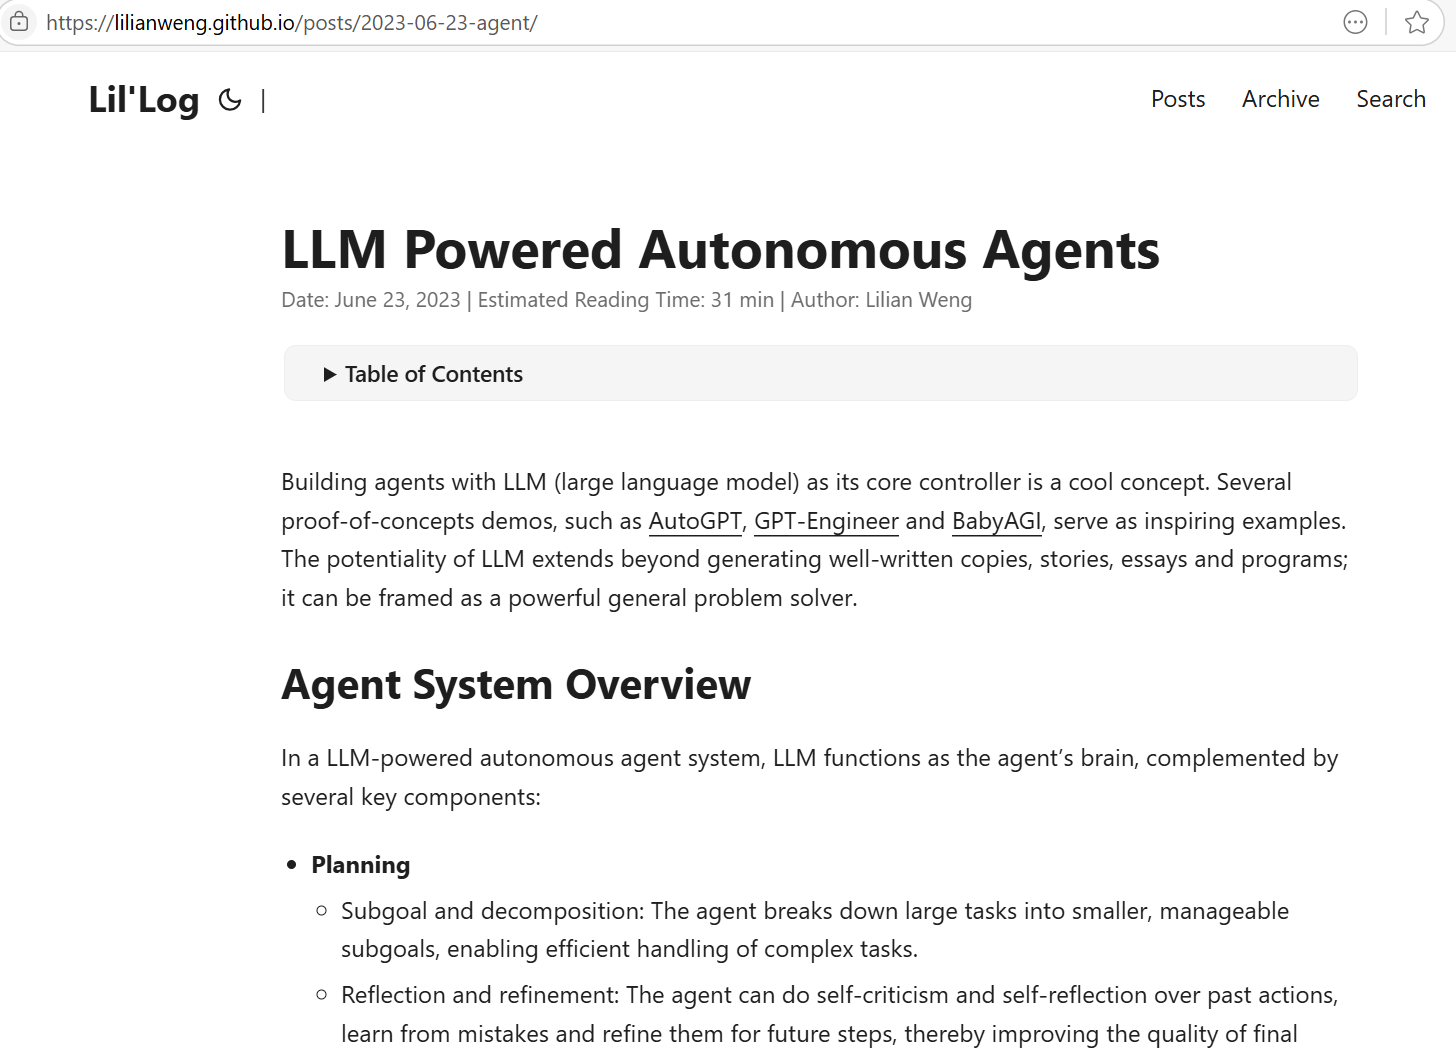

In [ ]:
# 用beautifulsoup筛选出感兴趣的内容
%pip install beautifulsoup4

**BeautifulSoup4（简称BS4）** 
- 是一个用于解析HTML和XML文档的Python库，能够通过转换器实现文档导航、搜索和修改，极大简化网页数据提取工作。它支持多种解析器（如html.parser、lxml、html5lib），提供直观的API用于遍历文档树、定位特定标签或属性，并自动修复不完整的标记。广泛应用于网络爬虫、数据清洗和网页模板解析等场景，是Python生态中处理网页数据的核心工具之一。

In [ ]:
import bs4
from langchain_community.document_loaders import WebBaseLoader

# Only keep post title, headers, and content from the full HTML.
bs4_strainer = bs4.SoupStrainer(class_=("post-title", "post-header", "post-content"))
loader = WebBaseLoader(web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),bs_kwargs={"parse_only": bs4_strainer},)
docs = loader.load()

assert len(docs) == 1
print(docs[0].page_content)

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,  # 块大小（字符数）
    chunk_overlap=100,  # 块之间的重叠（字符数）
    separators=["\n\n", "\n"],  # 优先按照"\n\n"分割，然后按照"\n"分割
)

chunks = text_splitter.split_documents(docs)
print(f"分割后得到 {len(chunks)} 个块")

In [ ]:
chunks[0]

In [ ]:
for i, chunk in enumerate(chunks):
    print(f"chunk {i}: {len(chunk.page_content.split(' '))} words")
    print(chunk.page_content)
    print(20*'------')

In [ ]:
html_chunks = chunks

# Chroma

[Chroma 官方文档](https://docs.trychroma.com/docs)

## 数据分块存储

In [ ]:
%pip install chromadb

**注意，如果需要持久化到磁盘，用chromadb.PersistentClient，用chromadb.Client则只是内存存储**

In [ ]:
import chromadb

# 1. 初始化Chroma（默认使用all-MiniLM-L6-v2模型）
persist_directory = "vector_db"
client = chromadb.PersistentClient(path=persist_directory)

- [Chroma 支持的模型](https://docs.trychroma.com/docs/embeddings/embedding-functions)
- 使用 sentence_transformers 的 all-MiniLM-L6-v2 模型，这也是 Chroma 默认的模型

In [ ]:
from chromadb.utils import embedding_functions

# 2. 使用 SentenceTransformer 模型
embedding_func = embedding_functions.SentenceTransformerEmbeddingFunction(
    model_name="all-MiniLM-L6-v2"
)

- 模型会保存在如下路径：~/.cache/huggingface/hub/models--sentence-transformers--all-MiniLM-L6-v2/
- [all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/blob/main/config.json) 支持最大输入文本token数为512，嵌入向量维度为384
- 在自然语言处理（NLP）中，token 是文本处理的最小单元，表示将句子或文档拆分后的独立元素。它可以是单词（如 "apple"）、子词（如 "un" + "happy"）、字符或符号（如标点），具体形式取决于分词器（Tokenizer）的规则。

**之前对数据分块没有考虑块大小对应的token数是否超过模型限制，需要分析下token数**

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")

In [ ]:
# markdown文件的每个块的token数
md_token_lens = [len(tokenizer.tokenize(chunk.page_content)) for chunk in md_chunks]

In [ ]:
# html文件的每个块的token数
html_token_lens = [len(tokenizer.tokenize(chunk.page_content)) for chunk in html_chunks]

**我们可以画出 token 长度的分布图，需要安装 python 的画图包：matplotlib**

In [ ]:
%pip install matplotlib

In [ ]:
# 画 token 长度的分布图
import matplotlib.pyplot as plt

plt.hist(md_token_lens, label='markdown token lens', alpha=0.5)
plt.hist(html_token_lens, label='html token lens', alpha=0.5)

# 添加竖直线
plt.axvline(x=512, color='red', linestyle='--', linewidth=1, label='Max Length (512)')

plt.legend()
plt.title('Token Length Distribution')
plt.xlabel('Token Length')
plt.ylabel('Count')
plt.show()

In [ ]:
# 获取溢出块
overflow_chunks = [chunk for chunk in md_chunks if len(tokenizer.tokenize(chunk.page_content)) > 512]

In [ ]:
print(f'有 {len(overflow_chunks)} 个块溢出')

In [ ]:
for chunk in overflow_chunks:
    print(chunk.page_content)
    print(10*"--------")

In [ ]:
# 打印溢出块的具体token
tokenizer.tokenize(overflow_chunks[0].page_content)

In [ ]:
# 如果觉得此数据无关紧要，可以简单过滤掉
md_chunks_new = [chunk for chunk in md_chunks if len(tokenizer.tokenize(chunk.page_content)) <= 512]

In [ ]:
len(md_chunks), len(md_chunks_new)

In [ ]:
# 3. 创建集合（类似数据库表）
collection = client.get_or_create_collection(
    name="course_data",
    embedding_function=embedding_func,
    metadata={"hnsw:space": "cosine"}  # 使用向量余弦计算相似性
)

In [ ]:
# 4. 准备数据id，不能重复
all_chunks = md_chunks_new + html_chunks
ids = [f"chunk_{i}" for i in range(len(all_chunks))]

In [ ]:
# 5. 准备元数据，检索的时候可以通过元数据进行过滤
metadatas = len(md_chunks_new) * [{"type": "thesis"}] + len(html_chunks) * [{"type": "blog"}]

In [ ]:
# 6. 批量存入向量数据库
# 从原始document类型中提取page_content字符串
chunks_str = [chunk.page_content for chunk in all_chunks]
collection.add(
    documents=chunks_str, # 文本内容
    metadatas=metadatas, # 元数据
    ids=ids              # 唯一标识符
)
print(f"成功存储 {collection.count()} 个文本块!")

In [ ]:
# 上面如果报错（Numpy is not available in add.）则重装numpy到1.23.5，然后重启jupyter kernal即可
# %pip uninstall numpy -y
# %pip install numpy==1.23.5 --no-cache-dir --force-reinstall

## 数据检索

In [ ]:
# 拟RAG查询，查询最相关的3个
query = "What is attention mechanism in transformer?"
# query = "Tell me something about chain-of-thought."
# query = "What is Scientific Discovery Agent?"
results = collection.query(
    query_texts=[query],
    n_results=3,
    where={"type": "thesis"}, # 元数据过滤
    where_document={"$contains":"attention"}, # 内容过滤
    include=["documents", "distances", "embeddings", "metadatas"]  # 返回完整信息
)

In [ ]:
results

In [ ]:
# 验证嵌入向量维度，确实是384维
results['embeddings'][0].shape

In [ ]:
results['embeddings'][0][0]

In [ ]:
# 结果返回的距离如下，可以简单验证下
results['distances']

In [ ]:
# 利用之前定义的 embedding_func 手动计算 query 的嵌入向量，然后计算和 results 中的 embedding 之间的余弦相似度
# 注意 query 外必须用加 [ ]，否则会计算 query 中所有字符的嵌入向量
embedding = embedding_func([query])[0]

In [ ]:
# 验证距离
similarities = results['embeddings'][0].dot(embedding)
distances = 1 - similarities

In [ ]:
print(distances)

In [ ]:
# 打印检索结果
print("最相关的3个结果:")
for i, doc in enumerate(results['documents'][0]):
    print(f"【结果 {i+1}】{doc[:1000]}...")
    print(f"相似度：{1 - results['distances'][0][i]:.2f}\n")

In [ ]:
# 拼接prompt交给LLM进行最终回答
query = "What is attention mechanism in transformer?"
retrieved_text = results['documents'][0][0] # 使用最相似的
prompt = f"Please answer the question：{query} based on the following content：{retrieved_text}"
answer = LLM.generate(inputs=prompt) # LLM替换成真实可用的

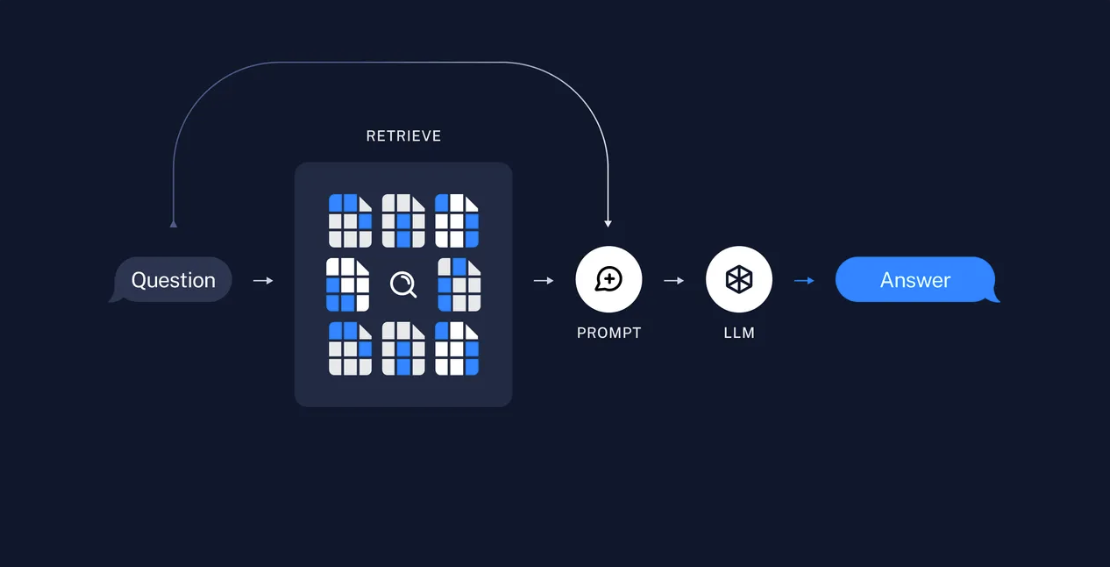